In [3]:
# Install dependencies
!pip install fastbook
!pip install ipywidgets

You should consider upgrading via the 'C:\Users\aleck\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\aleck\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
# Import dependencies
import fastbook
fastbook.setup_book()
from fastbook import *
from ipywidgets import *
from fastai.vision.widgets import *

In [16]:
path = Path('data')

In [7]:
# Get folder images
fns = get_image_files(path)
fns

(#2380) [Path('data/fifty_dollar_bills/fifty_dollar_bill_1.png'),Path('data/fifty_dollar_bills/fifty_dollar_bill_10.png'),Path('data/fifty_dollar_bills/fifty_dollar_bill_100.png'),Path('data/fifty_dollar_bills/fifty_dollar_bill_101.png'),Path('data/fifty_dollar_bills/fifty_dollar_bill_102.png'),Path('data/fifty_dollar_bills/fifty_dollar_bill_103.png'),Path('data/fifty_dollar_bills/fifty_dollar_bill_104.png'),Path('data/fifty_dollar_bills/fifty_dollar_bill_105.png'),Path('data/fifty_dollar_bills/fifty_dollar_bill_106.png'),Path('data/fifty_dollar_bills/fifty_dollar_bill_107.png')...]

In [8]:
# Remove corrupted images
failed = verify_images(fns)
failed.map(Path.unlink)

(#0) []

In [9]:
# Create datablock template
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


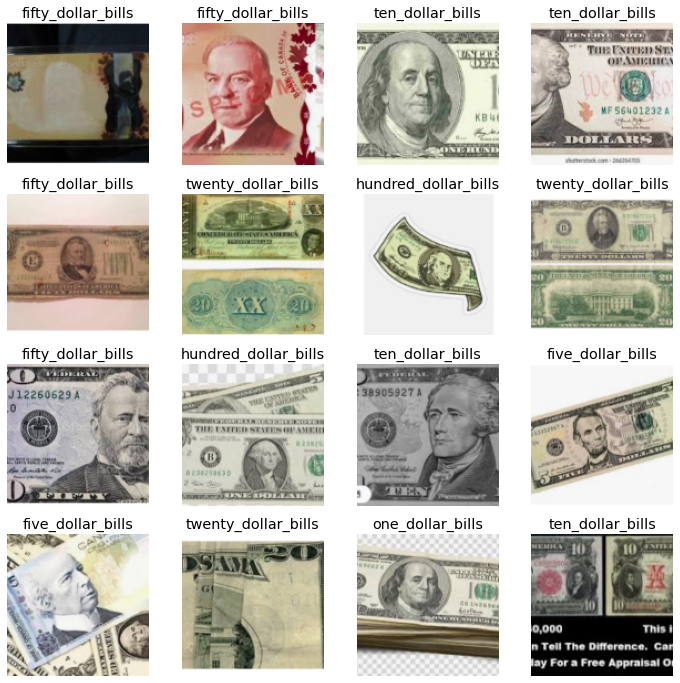

In [10]:
# Load data from directory
dl = db.dataloaders(path)
dl.valid.show_batch(max_n=16, nrows=4)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\aleck\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


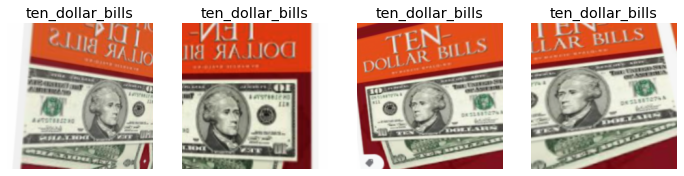

In [11]:
# Augment data and transform to same size
db = db.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dl = db.dataloaders(path)
dl.train.show_batch(max_n=4, nrows=1, unique=True)

In [12]:
# Train data with resnet, 18 layer neural network
model = cnn_learner(dl, resnet18, metrics=error_rate)
model.fine_tune(4)

# Note: Accuracy of model is 1 - error_rate

epoch,train_loss,valid_loss,error_rate,time
0,2.685920,1.905763,0.600840,04:30


epoch,train_loss,valid_loss,error_rate,time
0,1.896539,1.624955,0.512605,05:21
1,1.654641,1.548890,0.466387,05:04
2,1.432147,1.379890,0.420168,05:01
3,1.261915,1.353920,0.413866,05:24


In [30]:
# Discard bad images
cleaner = ImageClassifierCleaner(model)
cleaner

In [31]:
# Remove bad data
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()

# Move wrongly classified data to correct label
for idx, folder in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), path/folder)

In [32]:
# Re-train data with cleaned data
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
db = db.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dl = db.dataloaders(path)

model = cnn_learner(dl, resnet18, metrics=error_rate)
model.fine_tune(4)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,error_rate,time
0,2.755187,1.973372,0.692308,02:27


epoch,train_loss,valid_loss,error_rate,time
0,1.816251,1.507015,0.461538,03:03
1,1.475271,1.369269,0.384615,02:42
2,1.200712,1.272655,0.339744,02:40
3,1.057013,1.249326,0.333333,02:49


In [33]:
# Export model to pkl
model.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]